In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import numpy as np
import seaborn as sns
import pandas as pd

from collections import OrderedDict

In [2]:
def pretty_dataset_name(dataset_name):
    if dataset_name == 'eth':
        return 'ETH - Univ'
    elif dataset_name == 'hotel':
        return 'ETH - Hotel'
    elif dataset_name == 'univ':
        return 'UCY - Univ'
    elif dataset_name == 'zara1':
        return 'UCY - Zara 1'
    elif dataset_name == 'zara2':
        return 'UCY - Zara 2'
    else:
        return dataset_name

# Displacement Error Analysis

In [5]:
prior_work_fse_results = {
    'ETH - Univ': OrderedDict([('Linear', 2.94), ('Vanilla LSTM', 2.41), ('Social LSTM', 2.35), ('Social Attention', 3.74)]),
    'ETH - Hotel': OrderedDict([('Linear', 0.72), ('Vanilla LSTM', 1.91), ('Social LSTM', 1.76), ('Social Attention', 2.64)]),
    'UCY - Univ': OrderedDict([('Linear', 1.59), ('Vanilla LSTM', 1.31), ('Social LSTM', 1.40), ('Social Attention', 0.52)]),
    'UCY - Zara 1': OrderedDict([('Linear', 1.21), ('Vanilla LSTM', 0.88), ('Social LSTM', 1.00), ('Social Attention', 2.13)]),
    'UCY - Zara 2': OrderedDict([('Linear', 1.48), ('Vanilla LSTM', 1.11), ('Social LSTM', 1.17), ('Social Attention', 3.92)]),
    'Average': OrderedDict([('Linear', 1.59), ('Vanilla LSTM', 1.52), ('Social LSTM', 1.54), ('Social Attention', 2.59)])
}


# These are for a prediction horizon of 12 timesteps.
prior_work_ade_results = {
    'ETH - Univ': OrderedDict([('Linear', 1.33), ('Vanilla LSTM', 1.09), ('Social LSTM', 1.09), ('Social Attention', 0.39)]),
    'ETH - Hotel': OrderedDict([('Linear', 0.39), ('Vanilla LSTM', 0.86), ('Social LSTM', 0.79), ('Social Attention', 0.29)]),
    'UCY - Univ': OrderedDict([('Linear', 0.82), ('Vanilla LSTM', 0.61), ('Social LSTM', 0.67), ('Social Attention', 0.20)]),
    'UCY - Zara 1': OrderedDict([('Linear', 0.62), ('Vanilla LSTM', 0.41), ('Social LSTM', 0.47), ('Social Attention', 0.30)]),
    'UCY - Zara 2': OrderedDict([('Linear', 0.77), ('Vanilla LSTM', 0.52), ('Social LSTM', 0.56), ('Social Attention', 0.33)]),
    'Average': OrderedDict([('Linear', 0.79), ('Vanilla LSTM', 0.70), ('Social LSTM', 0.72), ('Social Attention', 0.30)])
}

linestyles = ['--', '-.', '-', ':']

In [6]:
dataset_names = ['eth', 'hotel', 'univ', 'zara1', 'zara2', 'Average']
alg_name = "Ours"

In [7]:
mean_markers = 'X'
marker_size = 7
line_colors = ['#1f78b4','#33a02c','#fb9a99','#e31a1c']
area_colors = ['#80CBE5','#ABCB51', '#F05F78']
area_rgbs = list()
for c in area_colors:
    area_rgbs.append([int(c[i:i+2], 16) for i in (1, 3, 5)])

In [7]:
# Load Ours
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"csv/{dataset}*fde_z_best.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = alg_name
        perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
#perf_df.head()

csv/eth_fde_z_best.csv
csv/hotel_fde_z_best.csv


/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


csv/univ_fde_z_best.csv
csv/zara1_fde_z_best.csv
csv/zara2_fde_z_best.csv


In [8]:
# Load Trajectron and GAN
errors_df = pd.concat([pd.read_csv(f) for f in glob.glob('csv/old/curr_*_errors.csv')], ignore_index=True)
del errors_df['data_precondition']
errors_df = errors_df[~(errors_df['method'] == 'our_full')]
errors_df = errors_df[~(errors_df['error_type'] == 'mse')]
errors_df.loc[errors_df['error_type'] =='fse', 'error_type'] = 'fde'
#errors_df.loc[errors_df['error_type'] =='mse', 'error_type'] = 'ade'
errors_df.loc[errors_df['method'] == 'our_most_likely', 'method'] = 'Trajectron'

In [9]:
perf_df = perf_df.append(errors_df)
errors_df

,dataset,method,run,node,sample,error_type,error_value
2186000,hotel,sgan,0,Pedestrian/0,0,fde,4.045972
2186001,hotel,sgan,0,Pedestrian/0,1,fde,3.717624
2186002,hotel,sgan,0,Pedestrian/0,2,fde,5.378286
2186003,hotel,sgan,0,Pedestrian/0,3,fde,4.215567
2186004,hotel,sgan,0,Pedestrian/0,4,fde,4.663851
...,...,...,...,...,...,...,...
77099995,zara2,sgan,99,Pedestrian/35,1995,fde,0.620136
77099996,zara2,sgan,99,Pedestrian/35,1996,fde,0.681608
77099997,zara2,sgan,99,Pedestrian/35,1997,fde,0.860765
77099998,zara2,sgan,99,Pedestrian/35,1998,fde,0.545317


/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

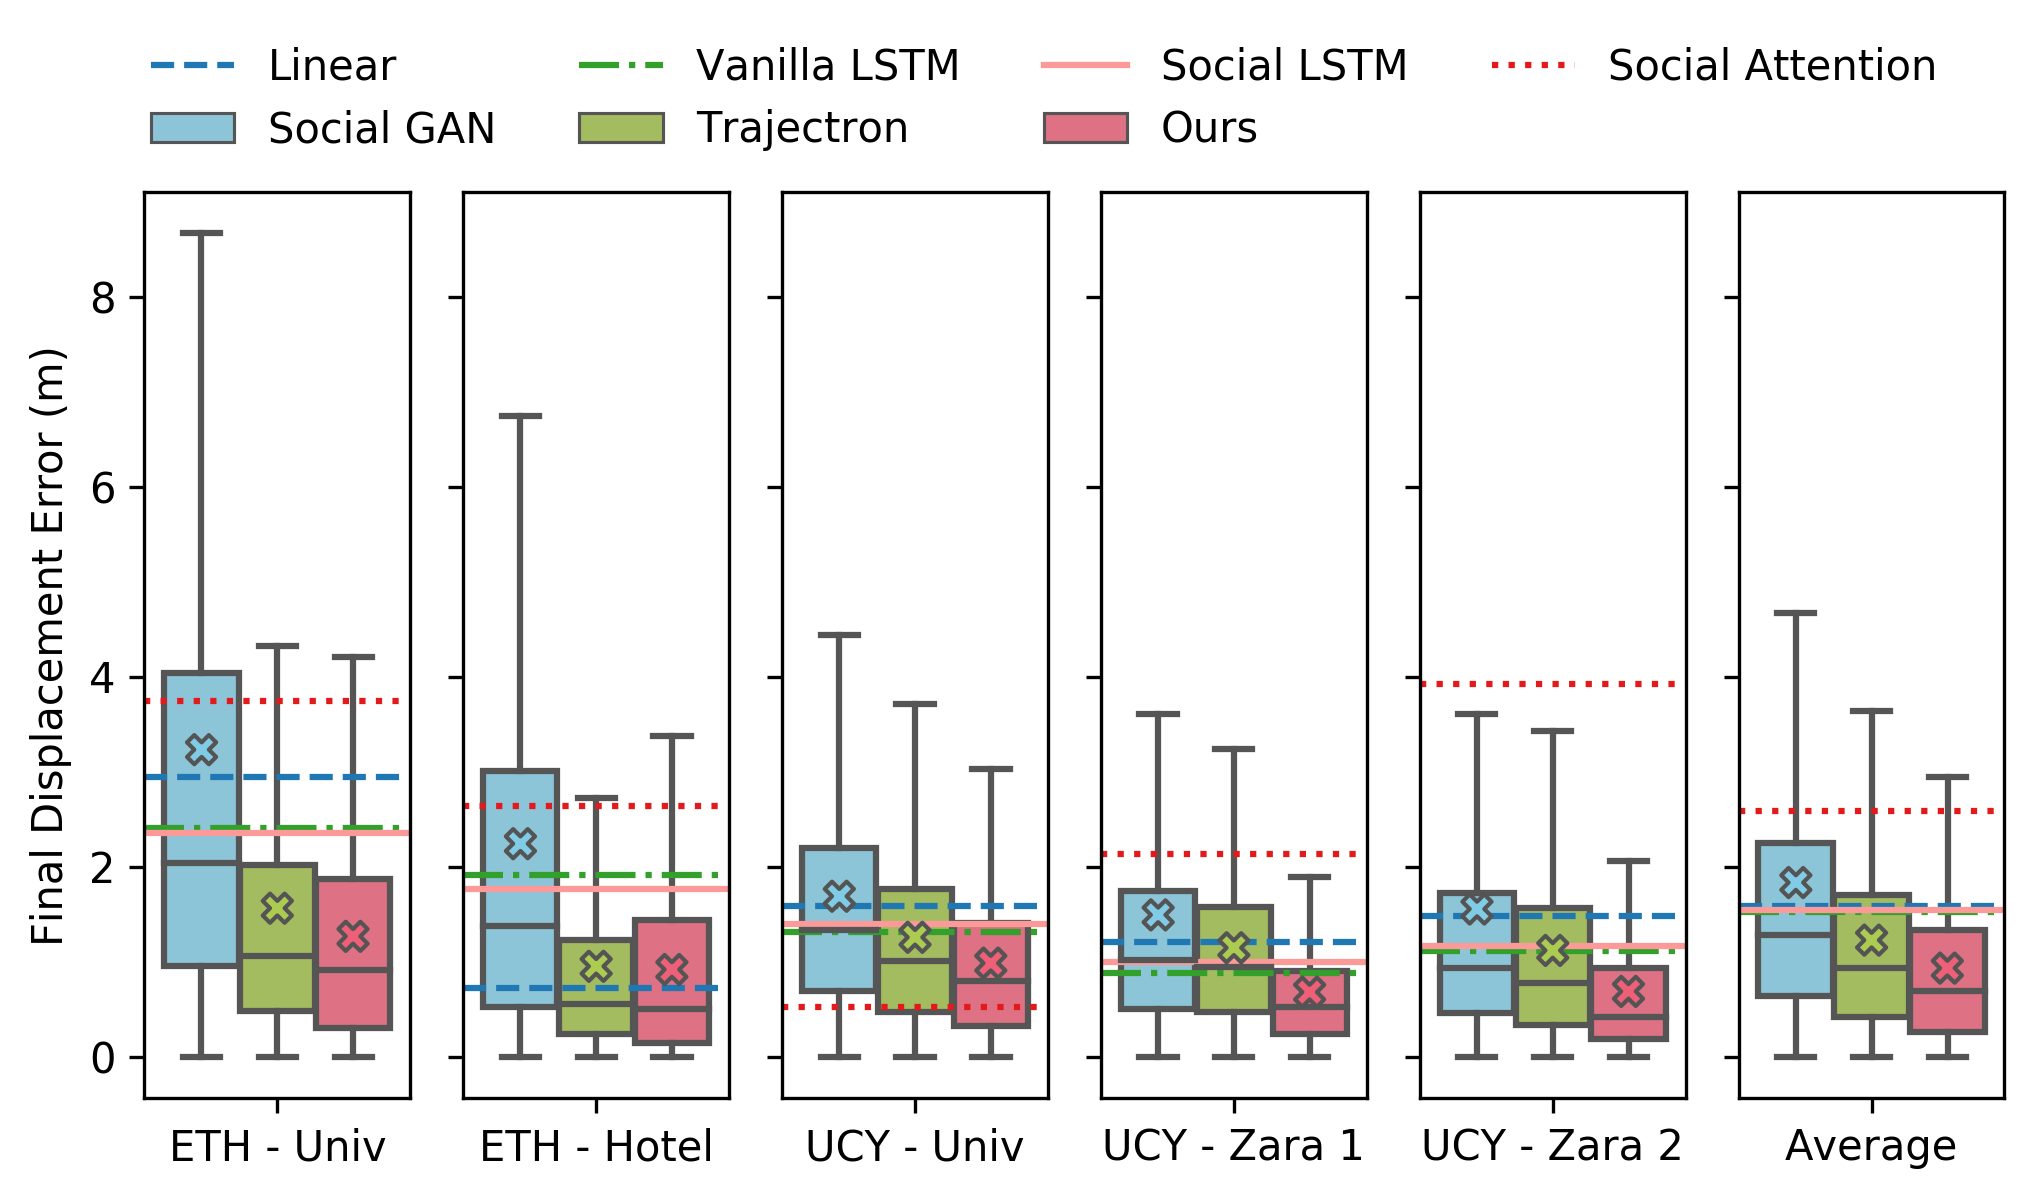

In [10]:
with sns.color_palette("muted"):
    fig_fse, ax_fses = plt.subplots(nrows=1, ncols=6, figsize=(8, 4), dpi=300, sharey=True)
    for idx, ax_fse in enumerate(ax_fses):
        dataset_name = dataset_names[idx]
        if dataset_name != 'Average':
            specific_df = perf_df[(perf_df['dataset'] == dataset_name) & (perf_df['error_type'] == 'fde')]
            specific_df['dataset'] = pretty_dataset_name(dataset_name)
        else:
            specific_df = perf_df[(perf_df['error_type'] == 'fde')].copy()
            specific_df['dataset'] = 'Average'

        sns.boxplot(x='dataset', y='error_value', hue='method',
            data=specific_df, ax=ax_fse, showfliers=False,
            palette=area_colors, hue_order=['sgan', 'Trajectron', alg_name], width=2.)
        
        ax_fse.get_legend().remove()
        ax_fse.set_xlabel('')
        ax_fse.set_ylabel('' if idx > 0 else 'Final Displacement Error (m)')

        ax_fse.scatter([-0.665, 0, 0.665],
               [np.mean(specific_df[specific_df['method'] == 'sgan']['error_value']),
                np.mean(specific_df[specific_df['method'] == 'Trajectron']['error_value']),
                np.mean(specific_df[specific_df['method'] == alg_name]['error_value'])],
               s=marker_size*marker_size, c=np.asarray(area_rgbs)/255.0, marker=mean_markers,
               edgecolors='#545454', zorder=10)
        
        for baseline_idx, (baseline, fse_val) in enumerate(prior_work_fse_results[pretty_dataset_name(dataset_name)].items()):
            ax_fse.axhline(y=fse_val, label=baseline, color=line_colors[baseline_idx], linestyle=linestyles[baseline_idx])
            
        if idx == 0:
            handles, labels = ax_fse.get_legend_handles_labels()


            handles = [handles[0], handles[4], handles[1], handles[5], handles[2], handles[6], handles[3]]
            labels = [labels[0], 'Social GAN', labels[1], 'Trajectron', labels[2], alg_name, labels[3]]

            ax_fse.legend(handles, labels, 
                          loc='lower center', bbox_to_anchor=(0.5, 0.9),
                          ncol=4, borderaxespad=0, frameon=False,
                          bbox_transform=fig_fse.transFigure)


#     fig_fse.text(0.51, 0.03, 'Dataset', ha='center')

plt.savefig('plots/fde_boxplots.pdf', dpi=300, bbox_inches='tight')

In [11]:
del perf_df
del errors_df

# Average Displacement Error

In [8]:
# Load Ours
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"csv/{dataset}*ade_z_best.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = alg_name
        perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
#perf_df.head()

csv/eth_ade_z_best.csv
csv/hotel_ade_z_best.csv


/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


csv/univ_ade_z_best.csv
csv/zara1_ade_z_best.csv
csv/zara2_ade_z_best.csv


In [9]:
# Load Trajectron and GAN
errors_df = pd.concat([pd.read_csv(f) for f in glob.glob('csv/old/curr_*_errors.csv')], ignore_index=True)
del errors_df['data_precondition']
errors_df = errors_df[~(errors_df['method'] == 'our_full')]
errors_df = errors_df[~(errors_df['error_type'] == 'fse')]
#errors_df.loc[errors_df['error_type'] =='fse', 'error_type'] = 'fde'
errors_df.loc[errors_df['error_type'] =='mse', 'error_type'] = 'ade'
errors_df.loc[errors_df['method'] == 'our_most_likely', 'method'] = 'Trajectron'

In [10]:
perf_df = perf_df.append(errors_df)
del errors_df

/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

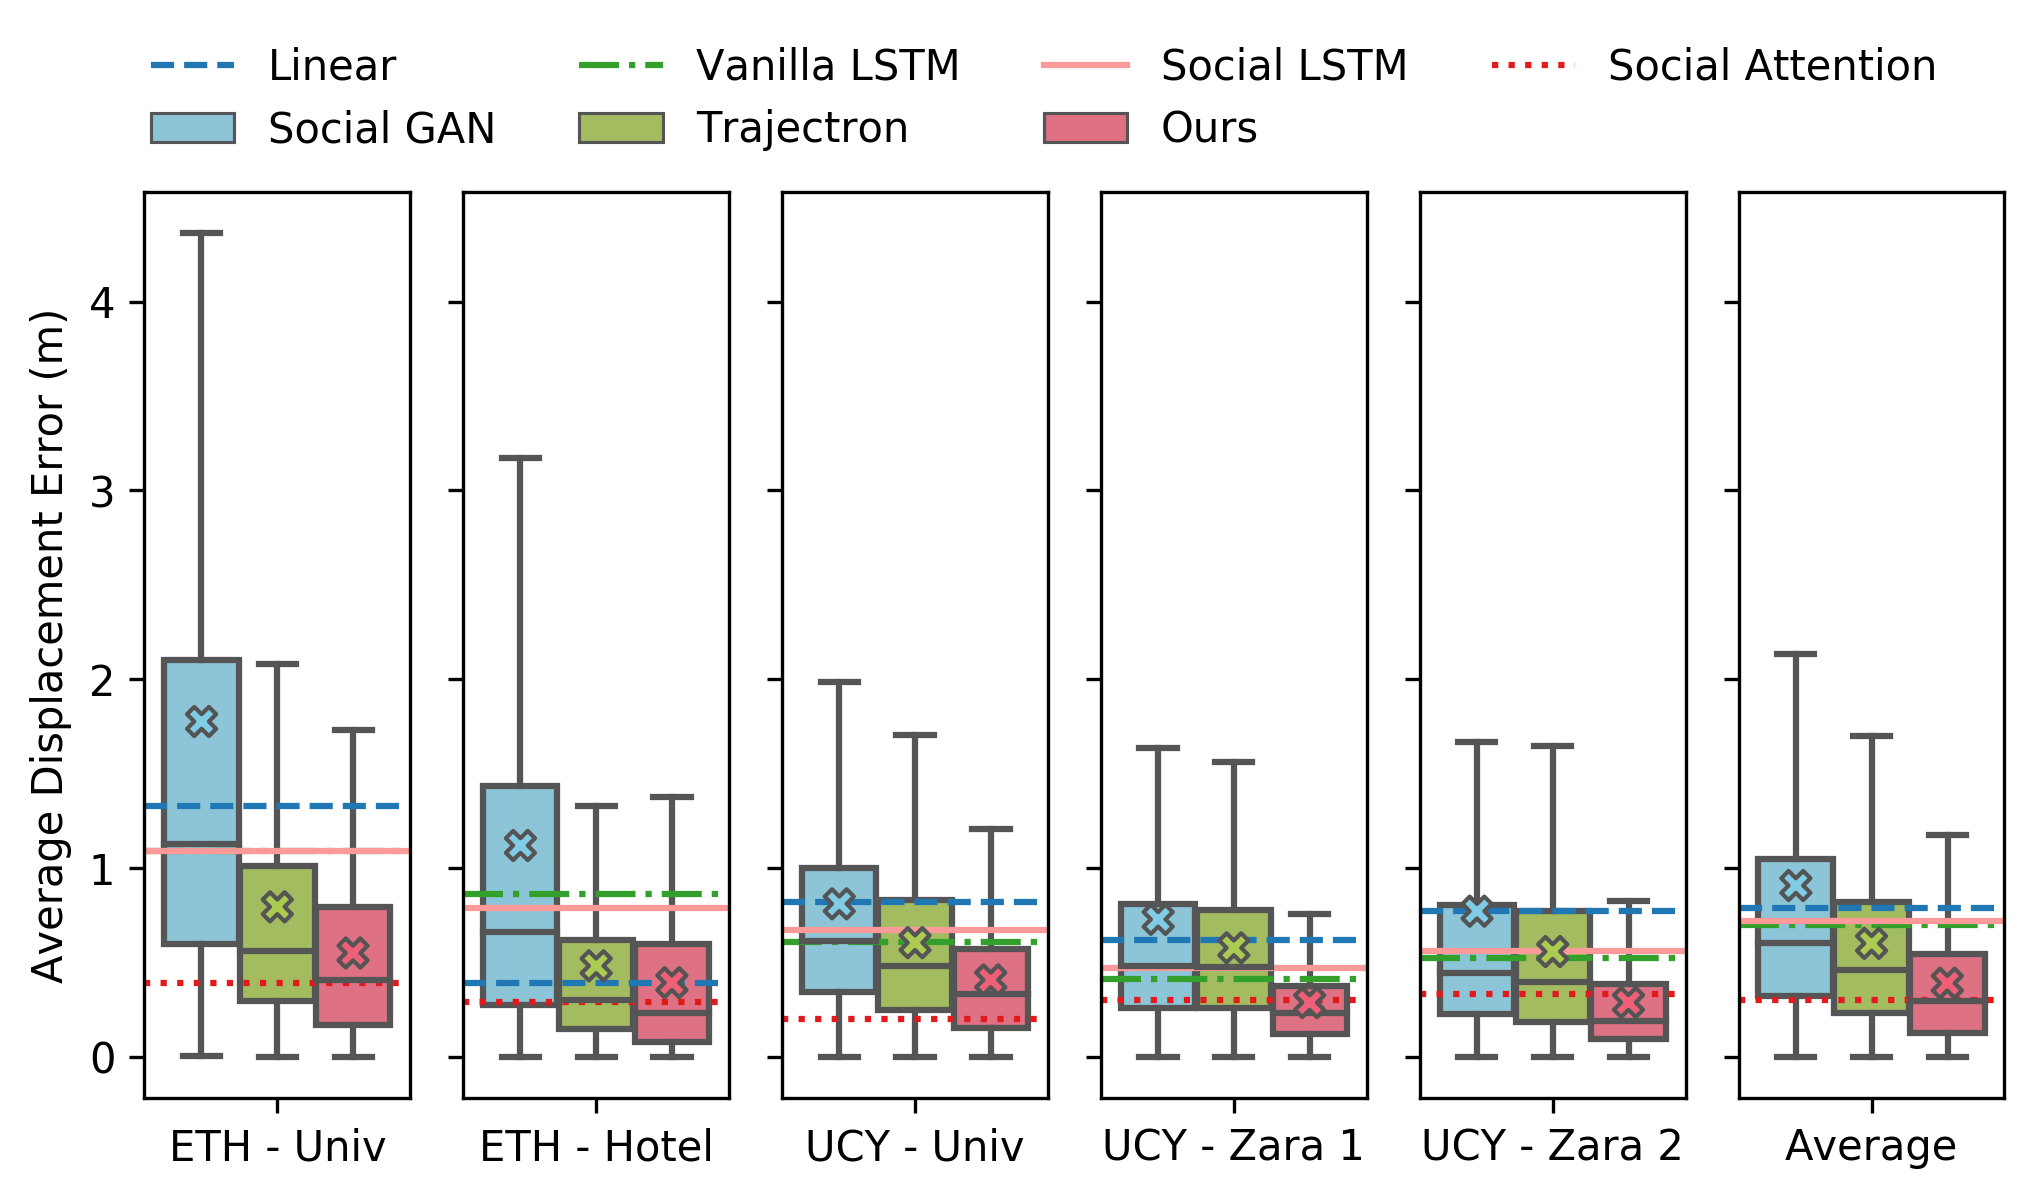

In [11]:
with sns.color_palette("muted"):
    fig_fse, ax_fses = plt.subplots(nrows=1, ncols=6, figsize=(8, 4), dpi=300, sharey=True)
    for idx, ax_fse in enumerate(ax_fses):
        dataset_name = dataset_names[idx]
        if dataset_name != 'Average':
            specific_df = perf_df[(perf_df['dataset'] == dataset_name) & (perf_df['error_type'] == 'ade')]
            specific_df['dataset'] = pretty_dataset_name(dataset_name)
        else:
            specific_df = perf_df[(perf_df['error_type'] == 'ade')].copy()
            specific_df['dataset'] = 'Average'

        sns.boxplot(x='dataset', y='error_value', hue='method',
            data=specific_df, ax=ax_fse, showfliers=False,
            palette=area_colors, hue_order=['sgan', 'Trajectron', alg_name], width=2.)

        ax_fse.get_legend().remove()
        ax_fse.set_xlabel('')
        ax_fse.set_ylabel('' if idx > 0 else 'Average Displacement Error (m)')

        ax_fse.scatter([-0.665, 0, 0.665],
               [np.mean(specific_df[specific_df['method'] == 'sgan']['error_value']),
                np.mean(specific_df[specific_df['method'] == 'Trajectron']['error_value']),
                np.mean(specific_df[specific_df['method'] == alg_name]['error_value'])],
               s=marker_size*marker_size, c=np.asarray(area_rgbs)/255.0, marker=mean_markers,
               edgecolors='#545454', zorder=10)
        
        for baseline_idx, (baseline, fse_val) in enumerate(prior_work_ade_results[pretty_dataset_name(dataset_name)].items()):
            ax_fse.axhline(y=fse_val, label=baseline, color=line_colors[baseline_idx], linestyle=linestyles[baseline_idx])
            
        if idx == 0:
            handles, labels = ax_fse.get_legend_handles_labels()


            handles = [handles[0], handles[4], handles[1], handles[5], handles[2], handles[6], handles[3]]
            labels = [labels[0], 'Social GAN', labels[1], 'Trajectron', labels[2], alg_name, labels[3]]

            ax_fse.legend(handles, labels, 
                          loc='lower center', bbox_to_anchor=(0.5, 0.9),
                          ncol=4, borderaxespad=0, frameon=False,
                          bbox_transform=fig_fse.transFigure)

#     fig_fse.text(0.51, 0.03, 'Dataset', ha='center')

plt.savefig('plots/ade_boxplots.pdf', dpi=300, bbox_inches='tight')

In [12]:
del perf_df

# KDE Negative Log Likelihood

In [7]:
# Load Ours
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"csv/{dataset}*kde_full.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = alg_name
        perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']
#perf_df.head()

csv/eth_kde_full.csv
csv/hotel_kde_full.csv
csv/univ_kde_full.csv
csv/zara1_kde_full.csv
csv/zara2_kde_full.csv


/home/timsal/anaconda3/envs/trajectron/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [8]:
# Load Trajectron and SGAN
lls_df = pd.concat([pd.read_csv(f) for f in glob.glob('csv/old/curr_*_lls.csv')], ignore_index=True)
lls_df.loc[lls_df['method'] == 'our_full', 'method'] = 'Trajectron'
lls_df['error_type'] = 'KDE'
#lls_df.head()

In [9]:
#for dataset in dataset_names:
#    print('KDE NLL for ' + pretty_dataset_name(dataset))
#    print(f"SGAN: {-lls_df[(lls_df['method'] == 'sgan')  & (lls_df['dataset'] == dataset)].groupby(['node', 'run']).mean().reset_index()['log-likelihood'].mean()}")
#    print(f"Trajectron: {-lls_df[(lls_df['method'] == 'Trajectron')  & (lls_df['dataset'] == dataset)].groupby(['node', 'run']).mean().reset_index()['log-likelihood'].mean()}")
#    print(f"Trajectron2: {perf_df[(perf_df['method'] == 'Trajectron2') & (perf_df['dataset'] == dataset)]['error_value'].mean()}")

In [12]:
for dataset in dataset_names:
    if dataset != 'Average':
        print('KDE NLL for ' + pretty_dataset_name(dataset))
        print(f"SGAN: {-lls_df[(lls_df['method'] == 'sgan') & (lls_df['dataset'] == dataset)]['log-likelihood'].mean()}")
        print(f"Trajectron: {-lls_df[(lls_df['method'] == 'Trajectron')  & (lls_df['dataset'] == dataset)]['log-likelihood'].mean()}")
        print(f"{alg_name}: {perf_df[(perf_df['method'] == alg_name) & (perf_df['dataset'] == dataset)]['error_value'].mean()}")
    else:
        print('KDE NLL for ' + pretty_dataset_name(dataset))
        print(f"SGAN: {-lls_df[(lls_df['method'] == 'sgan')]['log-likelihood'].mean()}")
        print(f"Trajectron: {-lls_df[(lls_df['method'] == 'Trajectron')]['log-likelihood'].mean()}")
        print(f"{alg_name}: {perf_df[(perf_df['method'] == alg_name)]['error_value'].mean()}")
              

KDE NLL for ETH - Univ
SGAN: 15.69865013054859
Trajectron: 2.9917106605735677
GenTrajM: 4.806990100167915
KDE NLL for ETH - Hotel
SGAN: 8.097755201933287
Trajectron: 2.259502842362184
GenTrajM: -0.9841547387009082
KDE NLL for UCY - Univ
SGAN: 2.8768876652136868
Trajectron: 1.0527777509141971
GenTrajM: -0.3546557875222891
KDE NLL for UCY - Zara 1
SGAN: 1.3641438349243995
Trajectron: 1.8649412394992417
GenTrajM: -1.7566186765842864
KDE NLL for UCY - Zara 2
SGAN: 0.9588045034239165
Trajectron: 0.8144195475139515
GenTrajM: -1.6893548674697927
KDE NLL for Average
SGAN: 3.681263779199269
Trajectron: 1.2967141078761355
GenTrajM: -0.32659423948310634


In [ ]:
del perf_df

# Mode Mode Evaluation Final Displacement Error

In [13]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"csv/{dataset}*fde_mm.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = 'Trajectron2'
        perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']

csv/eth_fde_mm.csv
csv/hotel_fde_mm.csv
csv/univ_fde_mm.csv
csv/zara1_fde_mm.csv
csv/zara2_fde_mm.csv


In [15]:
for dataset in dataset_names:
    print('FDE MM for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron2') & (perf_df['dataset'] == dataset)]['error_value'].mean()}")
    else:
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron2')]['error_value'].mean()}")

FDE MM for ETH - Univ
GenTrajM: 1.192039174270811
FDE MM for ETH - Hotel
GenTrajM: 0.5618976654739694
FDE MM for UCY - Univ
GenTrajM: 0.8899527573054131
FDE MM for UCY - Zara 1
GenTrajM: 0.722613447883267
FDE MM for UCY - Zara 2
GenTrajM: 0.6700367714726944
FDE MM for Average
GenTrajM: 0.8372137210406193


In [16]:
del perf_df

# Mode Mode Evaluation Final Displacement Error

In [17]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"csv/{dataset}*ade_mm.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = 'Trajectron2'
        perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']

csv/eth_ade_mm.csv
csv/hotel_ade_mm.csv
csv/univ_ade_mm.csv
csv/zara1_ade_mm.csv
csv/zara2_ade_mm.csv


In [18]:
for dataset in dataset_names:
    print('ADE MM for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron2') & (perf_df['dataset'] == dataset)]['error_value'].mean()}")
    else:
        print(f"{alg_name}: {perf_df[(perf_df['method'] == 'Trajectron2')]['error_value'].mean()}")

ADE MM for ETH - Univ
Trajectron2: 0.503687777994222
ADE MM for ETH - Hotel
Trajectron2: 0.23791562110787332
ADE MM for UCY - Univ
Trajectron2: 0.35901092499192316
ADE MM for UCY - Zara 1
Trajectron2: 0.29302547124560535
ADE MM for UCY - Zara 2
Trajectron2: 0.2708360618251485
ADE MM for Average
Trajectron2: 0.3407002886221994


In [19]:
del perf_df

# Best of 20 Evaluation Final Displacement Error

In [20]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"csv/{dataset}*fde_best_of.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = 'Trajectron2'
        perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']

csv/eth_fde_best_of.csv
csv/hotel_fde_best_of.csv
csv/univ_fde_best_of.csv
csv/zara1_fde_best_of.csv
csv/zara2_fde_best_of.csv


In [21]:
for dataset in dataset_names:
    print('FDE Best of 20 for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"Trajectron2: {perf_df[(perf_df['method'] == 'Trajectron2') & (perf_df['dataset'] == dataset)]['error_value'].mean()}")
    else:
        print(f"Trajectron2: {perf_df[(perf_df['method'] == 'Trajectron2')]['error_value'].mean()}")

FDE Best of 20 for ETH - Univ
Trajectron2: 0.7740199887621263
FDE Best of 20 for ETH - Hotel
Trajectron2: 0.3756150918384512
FDE Best of 20 for UCY - Univ
Trajectron2: 0.4841945360007127
FDE Best of 20 for UCY - Zara 1
Trajectron2: 0.2826895365357732
FDE Best of 20 for UCY - Zara 2
Trajectron2: 0.2977709819045429
FDE Best of 20 for Average
Trajectron2: 0.45300471504571543


# Best of 20 Evaluation Average Displacement Error

In [22]:
perf_df = pd.DataFrame()
for dataset in dataset_names:
    for f in glob.glob(f"csv/{dataset}*ade_best_of.csv"):
        print(f)
        dataset_df = pd.read_csv(f)
        dataset_df['dataset'] = dataset
        dataset_df['method'] = 'Trajectron2'
        perf_df = perf_df.append(dataset_df, ignore_index=True)
        del perf_df['Unnamed: 0']

csv/eth_ade_best_of.csv
csv/hotel_ade_best_of.csv
csv/univ_ade_best_of.csv
csv/zara1_ade_best_of.csv
csv/zara2_ade_best_of.csv


In [23]:
for dataset in dataset_names:
    print('ADE Best of 20 for ' + pretty_dataset_name(dataset))
    if dataset != 'Average':
        print(f"Trajectron2: {perf_df[(perf_df['method'] == 'Trajectron2') & (perf_df['dataset'] == dataset)]['error_value'].mean()}")
    else:
        print(f"Trajectron2: {perf_df[(perf_df['method'] == 'Trajectron2')]['error_value'].mean()}")

ADE Best of 20 for ETH - Univ
Trajectron2: 0.3474110214094006
ADE Best of 20 for ETH - Hotel
Trajectron2: 0.17956575717796167
ADE Best of 20 for UCY - Univ
Trajectron2: 0.2189670080632848
ADE Best of 20 for UCY - Zara 1
Trajectron2: 0.14179548081134627
ADE Best of 20 for UCY - Zara 2
Trajectron2: 0.1439489577629119
ADE Best of 20 for Average
Trajectron2: 0.20801133060650898


## Best of for Trajectron

In [ ]:
our_full_err_df = errors_df[(errors_df['data_precondition'] == 'curr') & (errors_df['method'] == 'our_full')]
random_subsamples = np.random.choice(2000, size=20, replace=False).astype(int).tolist()

for dataset_name in dataset_names:
    print(dataset_name)
    if dataset_name != 'Average':
        curr_our_full_df = our_full_err_df[our_full_err_df['dataset'] == dataset_name]
        subsamp_our_full_df = curr_our_full_df[curr_our_full_df['sample'].isin(random_subsamples)] 
    else:   
        subsamp_our_full_df = our_full_err_df[our_full_err_df['sample'].isin(random_subsamples)]
 
    our_full_sample_errs_df = subsamp_our_full_df.groupby(['run', 'sample', 'error_type'])['error_value'].agg(['sum', 'count']).reset_index()
    our_full_best_sample_errs_df = our_full_sample_errs_df.iloc[our_full_sample_errs_df.groupby(["run", "error_type"])['sum'].idxmin()]
    described_our_full_errs = our_full_best_sample_errs_df.groupby(['error_type']).sum().reset_index()
    described_our_full_errs['best_of_100_mean_error'] = described_our_full_errs['sum'] / described_our_full_errs['count']
    
    print('-- OUR FULL --')
    print(described_our_full_errs)
    
    print()